<a href="https://colab.research.google.com/github/SupriyaSakshana/Tourism-Experience-Analytics-Classification-Prediction-and-Recommendation-System/blob/main/Tourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries:

In [2]:
import pandas as pd
import os

In [3]:
transactions = pd.read_excel("Transaction.xlsx")
users = pd.read_excel("User.xlsx")
items = pd.read_excel("Updated_Item.xlsx")
city = pd.read_excel("City.xlsx")
country = pd.read_excel("Country.xlsx")
continent = pd.read_excel("Continent.xlsx")
region = pd.read_excel("Region.xlsx")
mode = pd.read_excel("Mode.xlsx")
type = pd.read_excel("Type.xlsx")

The **head()** function is used to display the first few rows of a dataset.

It is mainly used in the pandas library when working with DataFrames in Python.

In [4]:

transactions.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating
0,3,70456,2022,10,2,640,5
1,8,7567,2022,10,4,640,5
2,9,79069,2022,10,3,640,5
3,10,31019,2022,10,3,640,3
4,15,43611,2022,10,2,640,3


In [5]:
users.head()

,UserId,ContinentId,RegionId,CountryId,CityId
0,14,5,20,155,220.0
1,16,3,14,101,3098.0
2,20,4,15,109,4303.0
3,23,1,4,22,154.0
4,25,3,14,101,3098.0


In [6]:
items.head()

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,13,Kuta Beach - Bali,Kuta
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"
2,640,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
3,650,1,13,Sanur Beach,Sanur
4,673,1,13,Seminyak Beach,Seminyak


In [7]:
city.head()

,CityId,CityName,CountryId
0,0,-,0
1,1,Douala,1
2,2,South Region,1
3,3,N'Djamena,2
4,4,Kigali,3


In [8]:
country.head()

,CountryId,Country,RegionId
0,0,-,0
1,1,Cameroon,1
2,2,Chad,1
3,3,Rwanda,1
4,4,Ethiopia,2


In [9]:
continent.head()

,ContinentId,Continent
0,0,-
1,1,Africa
2,2,America
3,3,Asia
4,4,Australia & Oceania


In [10]:
region.head()

,Region,RegionId,ContinentId
0,-,0,0
1,Central Africa,1,1
2,East Africa,2,1
3,North Africa,3,1
4,Southern Africa,4,1


In [11]:
mode.head()

,VisitModeId,VisitMode
0,0,-
1,1,Business
2,2,Couples
3,3,Family
4,4,Friends


In [12]:
type.head()


,AttractionTypeId,AttractionType
0,2,Ancient Ruins
1,10,Ballets
2,13,Beaches
3,19,Caverns & Caves
4,34,Flea & Street Markets


**Dataset information:**

In [13]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TransactionId  52930 non-null  int64
 1   UserId         52930 non-null  int64
 2   VisitYear      52930 non-null  int64
 3   VisitMonth     52930 non-null  int64
 4   VisitMode      52930 non-null  int64
 5   AttractionId   52930 non-null  int64
 6   Rating         52930 non-null  int64
dtypes: int64(7)
memory usage: 2.8 MB


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UserId       33530 non-null  int64  
 1   ContinentId  33530 non-null  int64  
 2   RegionId     33530 non-null  int64  
 3   CountryId    33530 non-null  int64  
 4   CityId       33526 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 1.3 MB


In [15]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AttractionId       1698 non-null   int64 
 1   AttractionCityId   1698 non-null   int64 
 2   AttractionTypeId   1698 non-null   object
 3   Attraction         1698 non-null   object
 4   AttractionAddress  1698 non-null   object
dtypes: int64(2), object(3)
memory usage: 66.5+ KB


In [16]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9143 entries, 0 to 9142
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CityId     9143 non-null   int64 
 1   CityName   9142 non-null   object
 2   CountryId  9143 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 214.4+ KB


In [17]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CountryId  165 non-null    int64 
 1   Country    165 non-null    object
 2   RegionId   165 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ KB


In [18]:
continent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ContinentId  6 non-null      int64 
 1   Continent    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes


In [19]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Region       22 non-null     object
 1   RegionId     22 non-null     int64 
 2   ContinentId  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [20]:
mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   VisitModeId  6 non-null      int64 
 1   VisitMode    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes


In [21]:
type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AttractionTypeId  17 non-null     int64 
 1   AttractionType    17 non-null     object
dtypes: int64(1), object(1)
memory usage: 404.0+ bytes


**Data Cleaning**

**1. Normalize Formatting:**

In [22]:
#strip leading and trailing whitespace from all column names:
items.columns = items.columns.str.strip()
mode.columns = mode.columns.str.strip()
transactions.columns = transactions.columns.str.strip()
users.columns = users.columns.str.strip()
region.columns = region.columns.str.strip()
type.columns = type.columns.str.strip()
city.columns = city.columns.str.strip()
continent.columns = continent.columns.str.strip()
country.columns = country.columns.str.strip()

**2. Verifying How many null values are present in each columns:**

In [23]:
#Verifying How many null values are present in each columns:
a = items.isna().sum().sort_values(ascending=False).reset_index()

#Rename columns
a.columns = ['Items', 'Missing_Value_Count']


In [24]:
a

,Items,Missing_Value_Count
0,AttractionId,0
1,AttractionCityId,0
2,AttractionTypeId,0
3,Attraction,0
4,AttractionAddress,0


In [25]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Items                5 non-null      object
 1   Missing_Value_Count  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [26]:
a.shape

(5, 2)

**Why a.type is not working?**

Because in Python:

✔ type() is a function
❌ It is NOT an attribute

In [27]:
#Verifying How many null values are present in each columns:
b = mode.isna().sum().sort_values(ascending=False).reset_index()
b

#Rename columns
b.columns = ['Mode', 'Missing_Value_Count']
b

,Mode,Missing_Value_Count
0,VisitModeId,0
1,VisitMode,0


In [28]:
#Verifying How many null values are present in each columns:
c = transactions.isna().sum().sort_values(ascending=False).reset_index()


#Rename columns
c.columns = ['Transaction_Details', 'Missing_Value_Count']
c


,Transaction_Details,Missing_Value_Count
0,TransactionId,0
1,UserId,0
2,VisitYear,0
3,VisitMonth,0
4,VisitMode,0
5,AttractionId,0
6,Rating,0


In [29]:
#Verifying How many null values are present in each columns:
d = users.isna().sum().sort_values(ascending=False).reset_index()


#Rename columns
d.columns = ['User_Details', 'Missing_Value_Count']
d

,User_Details,Missing_Value_Count
0,CityId,4
1,UserId,0
2,ContinentId,0
3,RegionId,0
4,CountryId,0


In [30]:
#Verifying How many null values are present in each columns:
e = region.isna().sum().sort_values(ascending=False).reset_index()

#Rename columns
e.columns = ['Region', 'Missing_Value_Count']
e

,Region,Missing_Value_Count
0,Region,0
1,RegionId,0
2,ContinentId,0


In [31]:
#Verifying How many null values are present in each columns:
f = type.isna().sum().sort_values(ascending=False).reset_index()

#Rename columns
f.columns = ['Type', 'Missing_Value_Count']
f

,Type,Missing_Value_Count
0,AttractionTypeId,0
1,AttractionType,0


In [32]:
#Verifying How many null values are present in each columns:
g = city.isna().sum().sort_values(ascending=False).reset_index()

#Rename columns
g.columns = ['City', 'Missing_Value_Count']
g

,City,Missing_Value_Count
0,CityName,1
1,CityId,0
2,CountryId,0


In [33]:
#Verifying How many null values are present in each columns:
h = continent.isna().sum().sort_values(ascending=False).reset_index()

#Rename columns
h.columns = ['Continent', 'Missing_Value_Count']
h

,Continent,Missing_Value_Count
0,ContinentId,0
1,Continent,0


In [34]:
#Verifying How many null values are present in each columns:
i= country.isna().sum().sort_values(ascending=False).reset_index()

#Rename columns
i.columns = ['Country', 'Missing_Value_Count']
i

,Country,Missing_Value_Count
0,CountryId,0
1,Country,0
2,RegionId,0


**3. Handling Missing data/values: City and User csv file has null values on the columns of CityName and CityId**

1.Replacing the nan values in CityName column of City csv file:

In [35]:
city['CityName'] = city['CityName'].fillna('Not Determined')
city.head()

,CityId,CityName,CountryId
0,0,-,0
1,1,Douala,1
2,2,South Region,1
3,3,N'Djamena,2
4,4,Kigali,3


In [36]:
city.isna().sum().sort_values(ascending=False).reset_index()

,index,0
0,CityId,0
1,CityName,0
2,CountryId,0


2.Replacing the nan values in CityId column of User csv file:

In [37]:
users['CityId'] = users['CityId'].fillna(users['CityId'].mode()[0])
users.head()

,UserId,ContinentId,RegionId,CountryId,CityId
0,14,5,20,155,220.0
1,16,3,14,101,3098.0
2,20,4,15,109,4303.0
3,23,1,4,22,154.0
4,25,3,14,101,3098.0


In [38]:
users.isna().sum().sort_values(ascending=False)

,0
UserId,0
ContinentId,0
RegionId,0
CountryId,0
CityId,0


3.Use label encoder to convert categorical value into numerical.

In [39]:
items.head()

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,13,Kuta Beach - Bali,Kuta
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"
2,640,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
3,650,1,13,Sanur Beach,Sanur
4,673,1,13,Seminyak Beach,Seminyak


What Is This Code Doing Here?

It is:

 Forcing numeric IDs into string

 Then re-encoding them into new numeric labels

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Convert the column to string type to ensure uniformity before encoding
items['AttractionTypeId'] = le.fit_transform(items['AttractionTypeId'].astype(str))

In [41]:
items.head()

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,1,Kuta Beach - Bali,Kuta
1,481,1,1,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"
2,640,1,8,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
3,650,1,1,Sanur Beach,Sanur
4,673,1,1,Seminyak Beach,Seminyak


In [42]:
items.tail()

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
1693,2961,8154,21,Ancient Temple - Churchdown,"Main Street, Churchdown, United Kingdom"
1694,2962,9142,21,Ancient Temple - Sanaa,"Main Street, Sanaa, Yemen"
1695,2963,9142,19,Science Museum - Sanaa,"Main Street, Sanaa, Yemen"
1696,2964,9142,20,Botanical Garden - Sanaa,"Main Street, Sanaa, Yemen"
1697,2965,9142,20,Botanical Garden - Sanaa,"Main Street, Sanaa, Yemen"


In [43]:
items

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,1,Kuta Beach - Bali,Kuta
1,481,1,1,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"
2,640,1,8,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
3,650,1,1,Sanur Beach,Sanur
4,673,1,1,Seminyak Beach,Seminyak
...,...,...,...,...,...
1693,2961,8154,21,Ancient Temple - Churchdown,"Main Street, Churchdown, United Kingdom"
1694,2962,9142,21,Ancient Temple - Sanaa,"Main Street, Sanaa, Yemen"
1695,2963,9142,19,Science Museum - Sanaa,"Main Street, Sanaa, Yemen"
1696,2964,9142,20,Botanical Garden - Sanaa,"Main Street, Sanaa, Yemen"


In [44]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AttractionId       1698 non-null   int64 
 1   AttractionCityId   1698 non-null   int64 
 2   AttractionTypeId   1698 non-null   int64 
 3   Attraction         1698 non-null   object
 4   AttractionAddress  1698 non-null   object
dtypes: int64(3), object(2)
memory usage: 66.5+ KB


4. Validating Data Relationships Between Tables - Data Model:

In [45]:
print("items:\n", items.columns)
print("mode:\n", mode.columns)
print("transaction:\n", transactions.columns)
print("users:\n", users.columns)
print("region:\n", region.columns)
print("type:\n", type.columns)
print("city:\n", city.columns)
print("continent:\n", continent.columns)
print("country:\n", country.columns)

items:
 Index(['AttractionId', 'AttractionCityId', 'AttractionTypeId', 'Attraction',
       'AttractionAddress'],
      dtype='object')
mode:
 Index(['VisitModeId', 'VisitMode'], dtype='object')
transaction:
 Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating'],
      dtype='object')
users:
 Index(['UserId', 'ContinentId', 'RegionId', 'CountryId', 'CityId'], dtype='object')
region:
 Index(['Region', 'RegionId', 'ContinentId'], dtype='object')
type:
 Index(['AttractionTypeId', 'AttractionType'], dtype='object')
city:
 Index(['CityId', 'CityName', 'CountryId'], dtype='object')
continent:
 Index(['ContinentId', 'Continent'], dtype='object')
country:
 Index(['CountryId', 'Country', 'RegionId'], dtype='object')


ER Model Structure

In [46]:
#User ──< Transaction >── Attraction
# │                         │
 #│                         ├── Type
 #│                         └── City ── Country ── Region ── Continent
 #│
 #└── City ── Country ── Region ── Continent

// =========================
// LOCATION HIERARCHY
// =========================

Table Continent {
  ContinentId integer [primary key]
  Continent varchar
}

Table Region {
  RegionId integer [primary key]
  Region varchar
  ContinentId integer [not null]
}

Table Country {
  CountryId integer [primary key]
  Country varchar
  RegionId integer [not null]
}

Table City {
  CityId integer [primary key]
  CityName varchar
  CountryId integer [not null]
}

// =========================
// USER
// =========================

Table Users {
  UserId integer [primary key]
  ContinentId integer
  RegionId integer
  CountryId integer
  CityId integer
}

// =========================
// ATTRACTION RELATED
// =========================

Table Mode {
  VisitModeId integer [primary key]
  VisitMode varchar
}

Table AttractionType {
  AttractionTypeId integer [primary key]
  AttractionType varchar
}

Table Attraction {
  AttractionId integer [primary key]
  AttractionCityId integer [not null]
  AttractionTypeId integer [not null]
  Attraction varchar
  AttractionAddress varchar
}

// =========================
// TRANSACTION
// =========================

Table Transaction {
  TransactionId integer [primary key]
  UserId integer [not null]
  VisitYear integer
  VisitMonth integer
  VisitMode integer [not null]
  AttractionId integer [not null]
  Rating integer
}

// =========================
// RELATIONSHIPS
// =========================

// Location hierarchy
Ref: Region.ContinentId > Continent.ContinentId
Ref: Country.RegionId > Region.RegionId
Ref: City.CountryId > Country.CountryId

// User location
Ref: Users.CityId > City.CityId
Ref: Users.CountryId > Country.CountryId
Ref: Users.RegionId > Region.RegionId
Ref: Users.ContinentId > Continent.ContinentId

// Attraction relations
Ref: Attraction.AttractionCityId > City.CityId
Ref: Attraction.AttractionTypeId > AttractionType.AttractionTypeId

// Transaction relations
Ref: Transaction.UserId > Users.UserId
Ref: Transaction.AttractionId > Attraction.AttractionId
Ref: Transaction.VisitMode > Mode.VisitModeId


In [47]:
from IPython.display import Image

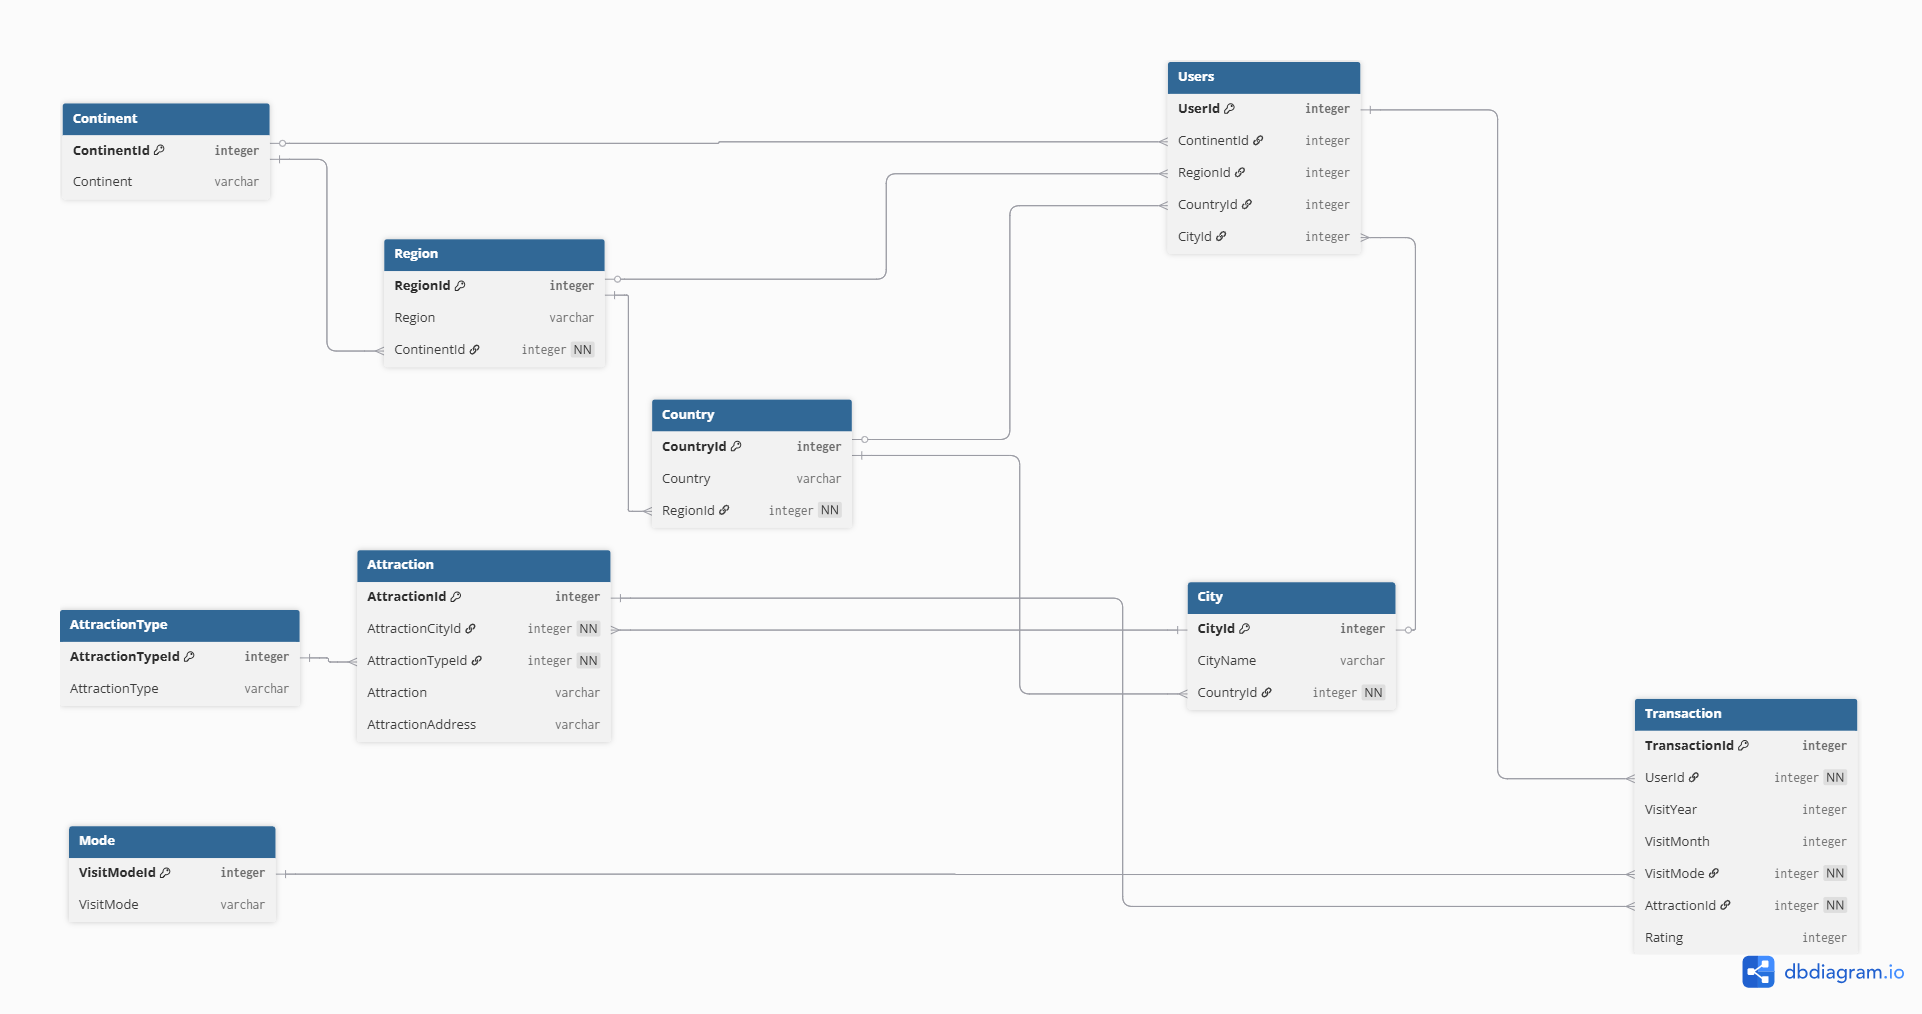

In [48]:
Image("ER-MODEL.png")

**No.Of. Rows & Columns:**

In [49]:
print("Item:",items.shape)
print("Mode:",mode.shape)
print("Transaction:", transactions.shape)
print("User:", users.shape)
print("Region:", region.shape)
print("Type:", type.shape)
print("City:", city.shape)
print("Continent:", continent.shape)
print("Country:", country.shape)

Item: (1698, 5)
Mode: (6, 2)
Transaction: (52930, 7)
User: (33530, 5)
Region: (22, 3)
Type: (17, 2)
City: (9143, 3)
Continent: (6, 2)
Country: (165, 3)


**4 Validate all relationships:**

In [50]:
# 1. transactions.VisitMode → mode.VisitModeId
transactions = transactions[transactions['VisitMode'].isin(mode['VisitModeId'])]

# 2. items.AttractionTypeId → type.AttractionTypeId
items = items[items['AttractionTypeId'].isin(type['AttractionTypeId'])]

# 3. users.CityId → city.CityId
users = users[users['CityId'].isin(city['CityId'])]

# 4. city.CountryId → country.CountryId
city = city[city['CountryId'].isin(country['CountryId'])]

# 5. country.RegionId → region.RegionId
country = country[country['RegionId'].isin(region['RegionId'])]

# 6. region.ContinentId → continent.ContinentId
region = region[region['ContinentId'].isin(continent['ContinentId'])]

**5. Standardize date and time format:**

In [51]:
# Combine VisitYear and VisitMonth into a datetime column (default day = 1)
transactions['VisitDate'] = pd.to_datetime(dict(
    year=transactions['VisitYear'],
    month=transactions['VisitMonth'],
    day=1
))

transactions

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,VisitDate
0,3,70456,2022,10,2,640,5,2022-10-01
1,8,7567,2022,10,4,640,5,2022-10-01
2,9,79069,2022,10,3,640,5,2022-10-01
3,10,31019,2022,10,3,640,3,2022-10-01
4,15,43611,2022,10,2,640,3,2022-10-01
...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,2018-09-01
52926,211238,88112,2016,2,2,1297,5,2016-02-01
52927,211239,88112,2016,2,2,1297,4,2016-02-01
52928,211240,88112,2016,2,2,1297,4,2016-02-01


In [52]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionId  52930 non-null  int64         
 1   UserId         52930 non-null  int64         
 2   VisitYear      52930 non-null  int64         
 3   VisitMonth     52930 non-null  int64         
 4   VisitMode      52930 non-null  int64         
 5   AttractionId   52930 non-null  int64         
 6   Rating         52930 non-null  int64         
 7   VisitDate      52930 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(7)
memory usage: 3.2 MB


**6. Handle outliers:**

To Handle Outlier, either use Domain-based rules (e.g., Rating should be between 1 and 5) or use Statistical rules(e.g., IQR)

In [53]:
# Domain-based rules (e.g., Rating should be between 1 and 5)
transactions = transactions[(transactions['Rating'] >= 1) & (transactions['Rating'] <= 5)]
transactions

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,VisitDate
0,3,70456,2022,10,2,640,5,2022-10-01
1,8,7567,2022,10,4,640,5,2022-10-01
2,9,79069,2022,10,3,640,5,2022-10-01
3,10,31019,2022,10,3,640,3,2022-10-01
4,15,43611,2022,10,2,640,3,2022-10-01
...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,2018-09-01
52926,211238,88112,2016,2,2,1297,5,2016-02-01
52927,211239,88112,2016,2,2,1297,4,2016-02-01
52928,211240,88112,2016,2,2,1297,4,2016-02-01


**7. Handle any incorrect entries other columns:**

This code removes rows where the ID value is 0.

It keeps only those rows where the ID is not equal to 0.

In [54]:
# Example: Remove rows with invalid details
city = city[city['CityId'] != 0]
items = items[items['AttractionCityId'] != 0]
region = region[region['RegionId'] != 0]
mode = mode[mode['VisitModeId'] != 0]
continent = continent[continent['ContinentId'] != 0]
country = country[country['CountryId'] != 0]

# **Preprocessing**


importing libraries:

In [55]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd
import os

**Feature Engineering:**

 Encode categorical variables such as VisitMode, Continent, Country, and AttractionTypeId

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['AttractionType', 'VisitMode', 'CityName', 'Country', 'Region', 'Continent']:
    df[col] = le.fit_transform(df[col])

**Encoding forced both columns into consistent numeric format**



In [56]:
label_encoder = LabelEncoder()

# Encode Continent, Region, Country, and City in User
users['ContinentId'] = label_encoder.fit_transform(users['ContinentId'])
users['RegionId'] = label_encoder.fit_transform(users['RegionId'])
users['CountryId'] = label_encoder.fit_transform(users['CountryId'])
users['CityId'] = label_encoder.fit_transform(users['CityId'])

# Encode AttractionTypeId in Mode
city['CityId'] = label_encoder.fit_transform(city['CityId'])
city['CountryId'] = label_encoder.fit_transform(city['CountryId'])

# Encode AttractionTypeId in Mode
country['CountryId'] = label_encoder.fit_transform(country['CountryId'])
country['RegionId'] = label_encoder.fit_transform(country['RegionId'])

# Encode AttractionTypeId in Mode
region['ContinentId'] = label_encoder.fit_transform(region['ContinentId'])
region['RegionId'] = label_encoder.fit_transform(region['RegionId'])


continent['ContinentId'] = label_encoder.fit_transform(continent['ContinentId'])

# Encode AttractionTypeId in Type
type['AttractionTypeId'] = label_encoder.fit_transform(type['AttractionTypeId'])

# Encode AttractionTypeId in Mode
mode['VisitModeId'] = label_encoder.fit_transform(mode['VisitModeId'])

# Encode AttractionTypeId in Item
items['AttractionTypeId'] = label_encoder.fit_transform(items['AttractionTypeId'])
items['AttractionCityId'] = label_encoder.fit_transform(items['AttractionCityId'])
items['AttractionId'] = label_encoder.fit_transform(items['AttractionId'])

# Encode VisitMode in Transaction
transactions['VisitMode'] = label_encoder.fit_transform(transactions['VisitMode'])
transactions['AttractionId'] = label_encoder.fit_transform(transactions['AttractionId'])

Aggregate user-level features to represent each user's profile (e.g., average ratings per visit mode).

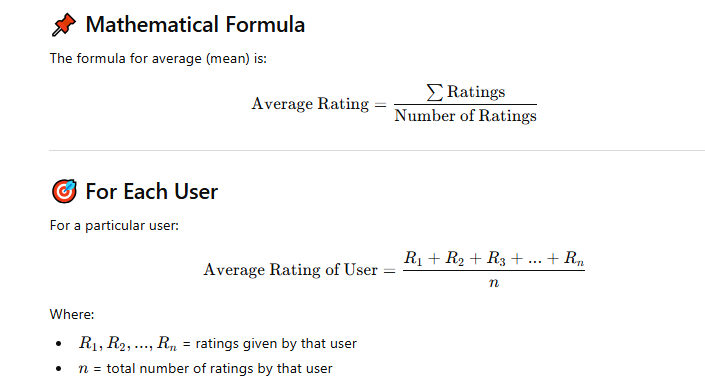

In [57]:
# Average rating per user
user_avg_rating = transactions.groupby('UserId')['Rating'].mean().reset_index().rename(columns={'Rating': 'Average rating per user'})
user_avg_rating.head()

,UserId,Average rating per user
0,14,4.666667
1,16,4.700000
2,20,4.000000
3,23,5.000000
4,25,5.000000


In [58]:
# Count of visits per VisitMode per user
visit_mode_count = transactions.groupby(['UserId', 'VisitMode']).size().reset_index()
visit_mode_count

visit_mode_count.columns = ['UserId', 'Visit ModeId', 'Total visits by VisitMode per user']
visit_mode_count = visit_mode_count.drop('Visit ModeId', axis= 1)
visit_mode_count

,UserId,Total visits by VisitMode per user
0,14,3
1,16,3
2,16,4
3,16,2
4,16,1
...,...,...
37227,88179,1
37228,88185,5
37229,88187,1
37230,88189,2


In [59]:
# Average rating per attraction
attraction_avg_rating = transactions.groupby('AttractionId')['Rating'].mean().reset_index()
attraction_avg_rating

attraction_avg_rating.columns = ['AttractionId', 'Average rating per attraction']
attraction_avg_rating.head()

,AttractionId,Average rating per attraction
0,0,3.415190
1,1,4.275665
2,2,4.267086
3,3,3.976347
4,4,3.800618


In [60]:
# Total visits per user
user_total_visits = transactions.groupby('UserId')['TransactionId'].count().reset_index()
user_total_visits

user_total_visits.columns = ['UserId', 'Total visits per user']
user_total_visits

,UserId,Total visits per user
0,14,3
1,16,10
2,20,1
3,23,1
4,25,1
...,...,...
33525,88179,1
33526,88185,5
33527,88187,1
33528,88189,2


In [61]:
transactions

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,VisitDate
0,3,70456,2022,10,1,2,5,2022-10-01
1,8,7567,2022,10,3,2,5,2022-10-01
2,9,79069,2022,10,2,2,5,2022-10-01
3,10,31019,2022,10,2,2,3,2022-10-01
4,15,43611,2022,10,1,2,3,2022-10-01
...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,1,29,4,2018-09-01
52926,211238,88112,2016,2,1,29,5,2016-02-01
52927,211239,88112,2016,2,1,29,4,2016-02-01
52928,211240,88112,2016,2,1,29,4,2016-02-01


In [62]:
# Merge with Transaction table
transactions = pd.merge(transactions,user_avg_rating, on='UserId', how='left')
transactions = pd.merge(transactions,visit_mode_count, on='UserId', how='left')
transactions = pd.merge(transactions,attraction_avg_rating, on='AttractionId', how='left')
transactions = pd.merge(transactions,user_total_visits, on='UserId', how='left')

In [63]:
transactions

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,VisitDate,Average rating per user,Total visits by VisitMode per user,Average rating per attraction,Total visits per user
0,3,70456,2022,10,1,2,5,2022-10-01,5.0,1,4.267086,1
1,8,7567,2022,10,3,2,5,2022-10-01,5.0,1,4.267086,1
2,9,79069,2022,10,2,2,5,2022-10-01,5.0,1,4.267086,1
3,10,31019,2022,10,2,2,3,2022-10-01,3.0,2,4.267086,2
4,15,43611,2022,10,1,2,3,2022-10-01,3.0,3,4.267086,3
...,...,...,...,...,...,...,...,...,...,...,...,...
68111,211227,87100,2018,9,1,29,4,2018-09-01,3.0,4,3.538847,4
68112,211238,88112,2016,2,1,29,5,2016-02-01,4.5,4,3.538847,4
68113,211239,88112,2016,2,1,29,4,2016-02-01,4.5,4,3.538847,4
68114,211240,88112,2016,2,1,29,4,2016-02-01,4.5,4,3.538847,4


In [64]:
Transaction = transactions.drop_duplicates()
transactions

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,VisitDate,Average rating per user,Total visits by VisitMode per user,Average rating per attraction,Total visits per user
0,3,70456,2022,10,1,2,5,2022-10-01,5.0,1,4.267086,1
1,8,7567,2022,10,3,2,5,2022-10-01,5.0,1,4.267086,1
2,9,79069,2022,10,2,2,5,2022-10-01,5.0,1,4.267086,1
3,10,31019,2022,10,2,2,3,2022-10-01,3.0,2,4.267086,2
4,15,43611,2022,10,1,2,3,2022-10-01,3.0,3,4.267086,3
...,...,...,...,...,...,...,...,...,...,...,...,...
68111,211227,87100,2018,9,1,29,4,2018-09-01,3.0,4,3.538847,4
68112,211238,88112,2016,2,1,29,5,2016-02-01,4.5,4,3.538847,4
68113,211239,88112,2016,2,1,29,4,2016-02-01,4.5,4,3.538847,4
68114,211240,88112,2016,2,1,29,4,2016-02-01,4.5,4,3.538847,4


In [65]:
mode

,VisitModeId,VisitMode
1,0,Business
2,1,Couples
3,2,Family
4,3,Friends
5,4,Solo


In [66]:
Merged_data1 = pd.merge(transactions, mode, left_on='VisitMode', right_on='VisitModeId', how='left')
Merged_data1 = Merged_data1.drop_duplicates()
Merged_data1

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode_x,AttractionId,Rating,VisitDate,Average rating per user,Total visits by VisitMode per user,Average rating per attraction,Total visits per user,VisitModeId,VisitMode_y
0,3,70456,2022,10,1,2,5,2022-10-01,5.0,1,4.267086,1,1,Couples
1,8,7567,2022,10,3,2,5,2022-10-01,5.0,1,4.267086,1,3,Friends
2,9,79069,2022,10,2,2,5,2022-10-01,5.0,1,4.267086,1,2,Family
3,10,31019,2022,10,2,2,3,2022-10-01,3.0,2,4.267086,2,2,Family
4,15,43611,2022,10,1,2,3,2022-10-01,3.0,3,4.267086,3,1,Couples
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68111,211227,87100,2018,9,1,29,4,2018-09-01,3.0,4,3.538847,4,1,Couples
68112,211238,88112,2016,2,1,29,5,2016-02-01,4.5,4,3.538847,4,1,Couples
68113,211239,88112,2016,2,1,29,4,2016-02-01,4.5,4,3.538847,4,1,Couples
68114,211240,88112,2016,2,1,29,4,2016-02-01,4.5,4,3.538847,4,1,Couples


In [67]:
items

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
6,0,0,1,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia"
16,1,1,1,Malang City Square,"Jl. Merdeka Utara, Malang 65119 Indonesia"
18,2,1,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia"
20,3,2,0,Jomblang Cave,"Jetis Wetan, Pacarejo, Semanu 55581 Indonesia"
28,4,2,1,Water Castle (Tamansari),"Jl. Taman, 55133 Indonesia"
...,...,...,...,...,...
1684,366,258,3,Cultural Heritage Center - Isle of Mull,"Main Street, Isle of Mull, United Kingdom"
1687,367,259,3,Science Museum - Tadworth,"Main Street, Tadworth, United Kingdom"
1688,368,259,3,Science Museum - Tadworth,"Main Street, Tadworth, United Kingdom"
1691,369,257,3,Cultural Heritage Center - Churchdown,"Main Street, Churchdown, United Kingdom"


In [68]:
type

,AttractionTypeId,AttractionType
0,0,Ancient Ruins
1,1,Ballets
2,2,Beaches
3,3,Caverns & Caves
4,4,Flea & Street Markets
5,5,Historic Sites
6,6,History Museums
7,7,National Parks
8,8,Nature & Wildlife Areas
9,9,Neighborhoods


In [69]:
Merged_data2 = pd.merge(items, type, on='AttractionTypeId', how='left')
Merged_data2

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType
0,0,0,1,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Ballets
1,1,1,1,Malang City Square,"Jl. Merdeka Utara, Malang 65119 Indonesia",Ballets
2,2,1,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches
3,3,2,0,Jomblang Cave,"Jetis Wetan, Pacarejo, Semanu 55581 Indonesia",Ancient Ruins
4,4,2,1,Water Castle (Tamansari),"Jl. Taman, 55133 Indonesia",Ballets
...,...,...,...,...,...,...
366,366,258,3,Cultural Heritage Center - Isle of Mull,"Main Street, Isle of Mull, United Kingdom",Caverns & Caves
367,367,259,3,Science Museum - Tadworth,"Main Street, Tadworth, United Kingdom",Caverns & Caves
368,368,259,3,Science Museum - Tadworth,"Main Street, Tadworth, United Kingdom",Caverns & Caves
369,369,257,3,Cultural Heritage Center - Churchdown,"Main Street, Churchdown, United Kingdom",Caverns & Caves


In [70]:
Merged_data3 = pd.merge(Merged_data1,Merged_data2, on='AttractionId', how='left')
Merged_data3

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode_x,AttractionId,Rating,VisitDate,Average rating per user,Total visits by VisitMode per user,Average rating per attraction,Total visits per user,VisitModeId,VisitMode_y,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType
0,3,70456,2022,10,1,2,5,2022-10-01,5.0,1,4.267086,1,1,Couples,1,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches
1,8,7567,2022,10,3,2,5,2022-10-01,5.0,1,4.267086,1,3,Friends,1,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches
2,9,79069,2022,10,2,2,5,2022-10-01,5.0,1,4.267086,1,2,Family,1,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches
3,10,31019,2022,10,2,2,3,2022-10-01,3.0,2,4.267086,2,2,Family,1,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches
4,15,43611,2022,10,1,2,3,2022-10-01,3.0,3,4.267086,3,1,Couples,1,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62218,211227,87100,2018,9,1,29,4,2018-09-01,3.0,4,3.538847,4,1,Couples,22,3,Cultural Heritage Center - Oujda,"Main Street, Oujda, Morocco",Caverns & Caves
62219,211238,88112,2016,2,1,29,5,2016-02-01,4.5,4,3.538847,4,1,Couples,22,3,Cultural Heritage Center - Oujda,"Main Street, Oujda, Morocco",Caverns & Caves
62220,211239,88112,2016,2,1,29,4,2016-02-01,4.5,4,3.538847,4,1,Couples,22,3,Cultural Heritage Center - Oujda,"Main Street, Oujda, Morocco",Caverns & Caves
62221,211240,88112,2016,2,1,29,4,2016-02-01,4.5,4,3.538847,4,1,Couples,22,3,Cultural Heritage Center - Oujda,"Main Street, Oujda, Morocco",Caverns & Caves


Aggregate user-level features to represent each user's profile (e.g., average ratings per visit mode).

In [71]:
# Average rating per user
user_avg_rating = Transaction.groupby('UserId')['Rating'].mean().reset_index().rename(columns={'Rating': 'Average rating per user'})
user_avg_rating.head()

,UserId,Average rating per user
0,14,4.666667
1,16,4.700000
2,20,4.000000
3,23,5.000000
4,25,5.000000


In [72]:
# Count of visits per VisitMode per user
visit_mode_count = transactions.groupby(['UserId', 'VisitMode']).size().reset_index()
visit_mode_count

visit_mode_count.columns = ['UserId', 'VisitMode', 'Total visits by VisitMode per user']
visit_mode_count = visit_mode_count.drop('VisitMode', axis= 1)
visit_mode_count

,UserId,Total visits by VisitMode per user
0,14,3
1,16,12
2,16,16
3,16,8
4,16,4
...,...,...
37227,88179,1
37228,88185,5
37229,88187,1
37230,88189,2


In [73]:
# Average rating per attraction
attraction_avg_rating = Transaction.groupby('AttractionId')['Rating'].mean().reset_index()
attraction_avg_rating

attraction_avg_rating.columns = ['AttractionId', 'Average rating per attraction']
attraction_avg_rating.head()

,AttractionId,Average rating per attraction
0,0,3.421232
1,1,4.278407
2,2,4.267218
3,3,3.986217
4,4,3.793304


In [74]:
# Total visits per user
user_total_visits = Transaction.groupby('UserId')['TransactionId'].count().reset_index()
user_total_visits

user_total_visits.columns = ['UserId', 'Total visits per user']
user_total_visits

,UserId,Total visits per user
0,14,3
1,16,40
2,20,1
3,23,1
4,25,1
...,...,...
33525,88179,1
33526,88185,5
33527,88187,1
33528,88189,2


In [75]:
transactions

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,VisitDate,Average rating per user,Total visits by VisitMode per user,Average rating per attraction,Total visits per user
0,3,70456,2022,10,1,2,5,2022-10-01,5.0,1,4.267086,1
1,8,7567,2022,10,3,2,5,2022-10-01,5.0,1,4.267086,1
2,9,79069,2022,10,2,2,5,2022-10-01,5.0,1,4.267086,1
3,10,31019,2022,10,2,2,3,2022-10-01,3.0,2,4.267086,2
4,15,43611,2022,10,1,2,3,2022-10-01,3.0,3,4.267086,3
...,...,...,...,...,...,...,...,...,...,...,...,...
68111,211227,87100,2018,9,1,29,4,2018-09-01,3.0,4,3.538847,4
68112,211238,88112,2016,2,1,29,5,2016-02-01,4.5,4,3.538847,4
68113,211239,88112,2016,2,1,29,4,2016-02-01,4.5,4,3.538847,4
68114,211240,88112,2016,2,1,29,4,2016-02-01,4.5,4,3.538847,4



Join with User (UserId) ──┬─→ City (CityId) ──→ Country (CountryId) ──→ Region (RegionId) ──→ Continent (ContinentId)

In [76]:
city

,CityId,CityName,CountryId
1,0,Douala,0
2,1,South Region,0
3,2,N'Djamena,1
4,3,Kigali,2
5,4,Kigali Province,2
...,...,...,...
9138,9137,Yeovil,161
9139,9138,York,161
9140,9139,Yorkshire,161
9141,9140,Zaandam,161


In [77]:
# Country.drop('RegionId',axis = 1, inplace= True)
country

,CountryId,Country,RegionId
1,0,Cameroon,1
2,1,Chad,1
3,2,Rwanda,1
4,3,Ethiopia,2
5,4,Kenya,2
...,...,...,...
160,159,Ireland,21
161,160,Monaco,21
162,161,Netherlands,21
163,162,United Kingdom,21


In [78]:
geographical_features = pd.merge(city,country, on='CountryId', how='left')
geographical_features

,CityId,CityName,CountryId,Country,RegionId
0,0,Douala,0,Cameroon,1
1,1,South Region,0,Cameroon,1
2,2,N'Djamena,1,Chad,1
3,3,Kigali,2,Rwanda,1
4,4,Kigali Province,2,Rwanda,1
...,...,...,...,...,...
9137,9137,Yeovil,161,Netherlands,21
9138,9138,York,161,Netherlands,21
9139,9139,Yorkshire,161,Netherlands,21
9140,9140,Zaandam,161,Netherlands,21


In [79]:
region

,Region,RegionId,ContinentId
1,Central Africa,0,0
2,East Africa,1,0
3,North Africa,2,0
4,Southern Africa,3,0
5,West Africa,4,0
6,Caribbean,5,1
7,Central America,6,1
8,Northern America,7,1
9,South America,8,1
10,Central Asia,9,2


In [80]:

geographical_features = pd.merge(geographical_features,region, on='RegionId', how='left')
geographical_features

,CityId,CityName,CountryId,Country,RegionId,Region,ContinentId
0,0,Douala,0,Cameroon,1,East Africa,0.0
1,1,South Region,0,Cameroon,1,East Africa,0.0
2,2,N'Djamena,1,Chad,1,East Africa,0.0
3,3,Kigali,2,Rwanda,1,East Africa,0.0
4,4,Kigali Province,2,Rwanda,1,East Africa,0.0
...,...,...,...,...,...,...,...
9137,9137,Yeovil,161,Netherlands,21,NaN,NaN
9138,9138,York,161,Netherlands,21,NaN,NaN
9139,9139,Yorkshire,161,Netherlands,21,NaN,NaN
9140,9140,Zaandam,161,Netherlands,21,NaN,NaN


In [81]:
continent

,ContinentId,Continent
1,0,Africa
2,1,America
3,2,Asia
4,3,Australia & Oceania
5,4,Europe


In [82]:
geographical_features = pd.merge(geographical_features,continent, on='ContinentId', how='left')
geographical_features

,CityId,CityName,CountryId,Country,RegionId,Region,ContinentId,Continent
0,0,Douala,0,Cameroon,1,East Africa,0.0,Africa
1,1,South Region,0,Cameroon,1,East Africa,0.0,Africa
2,2,N'Djamena,1,Chad,1,East Africa,0.0,Africa
3,3,Kigali,2,Rwanda,1,East Africa,0.0,Africa
4,4,Kigali Province,2,Rwanda,1,East Africa,0.0,Africa
...,...,...,...,...,...,...,...,...
9137,9137,Yeovil,161,Netherlands,21,NaN,NaN,NaN
9138,9138,York,161,Netherlands,21,NaN,NaN,NaN
9139,9139,Yorkshire,161,Netherlands,21,NaN,NaN,NaN
9140,9140,Zaandam,161,Netherlands,21,NaN,NaN,NaN


In [83]:
geographical_features = geographical_features.dropna(how='any')  #If there is 1 nan value, then the whole row will be dropped
geographical_features

,CityId,CityName,CountryId,Country,RegionId,Region,ContinentId,Continent
0,0,Douala,0,Cameroon,1,East Africa,0.0,Africa
1,1,South Region,0,Cameroon,1,East Africa,0.0,Africa
2,2,N'Djamena,1,Chad,1,East Africa,0.0,Africa
3,3,Kigali,2,Rwanda,1,East Africa,0.0,Africa
4,4,Kigali Province,2,Rwanda,1,East Africa,0.0,Africa
...,...,...,...,...,...,...,...,...
7328,7328,Zeebrugge,156,Spain,20,Western Europe,4.0,Europe
7329,7329,Zele,156,Spain,20,Western Europe,4.0,Europe
7330,7330,Zoutleeuw,156,Spain,20,Western Europe,4.0,Europe
7331,7331,Zuienkerke,156,Spain,20,Western Europe,4.0,Europe


In [84]:
geographical_features = geographical_features[['CityId','CityName','Country','Region','Continent']]
geographical_features

,CityId,CityName,Country,Region,Continent
0,0,Douala,Cameroon,East Africa,Africa
1,1,South Region,Cameroon,East Africa,Africa
2,2,N'Djamena,Chad,East Africa,Africa
3,3,Kigali,Rwanda,East Africa,Africa
4,4,Kigali Province,Rwanda,East Africa,Africa
...,...,...,...,...,...
7328,7328,Zeebrugge,Spain,Western Europe,Europe
7329,7329,Zele,Spain,Western Europe,Europe
7330,7330,Zoutleeuw,Spain,Western Europe,Europe
7331,7331,Zuienkerke,Spain,Western Europe,Europe


In [85]:
Merged_data = pd.merge(Merged_data3,users, on='UserId', how='left')
Merged_data

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode_x,AttractionId,Rating,VisitDate,Average rating per user,Total visits by VisitMode per user,...,VisitMode_y,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,ContinentId,RegionId,CountryId,CityId
0,3,70456,2022,10,1,2,5,2022-10-01,5.0,1,...,Couples,1,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,4,21,151,2779
1,8,7567,2022,10,3,2,5,2022-10-01,5.0,1,...,Friends,1,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,1,8,43,317
2,9,79069,2022,10,2,2,5,2022-10-01,5.0,1,...,Family,1,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,1,9,48,522
3,10,31019,2022,10,2,2,3,2022-10-01,3.0,2,...,Family,1,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,4,17,124,398
4,15,43611,2022,10,1,2,3,2022-10-01,3.0,3,...,Couples,1,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,4,21,151,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62218,211227,87100,2018,9,1,29,4,2018-09-01,3.0,4,...,Couples,22,3,Cultural Heritage Center - Oujda,"Main Street, Oujda, Morocco",Caverns & Caves,4,21,147,4568
62219,211238,88112,2016,2,1,29,5,2016-02-01,4.5,4,...,Couples,22,3,Cultural Heritage Center - Oujda,"Main Street, Oujda, Morocco",Caverns & Caves,4,17,122,3896
62220,211239,88112,2016,2,1,29,4,2016-02-01,4.5,4,...,Couples,22,3,Cultural Heritage Center - Oujda,"Main Street, Oujda, Morocco",Caverns & Caves,4,17,122,3896
62221,211240,88112,2016,2,1,29,4,2016-02-01,4.5,4,...,Couples,22,3,Cultural Heritage Center - Oujda,"Main Street, Oujda, Morocco",Caverns & Caves,4,17,122,3896


In [86]:
Final_Merged_data = pd.merge(Merged_data,geographical_features, on='CityId', how='left')
Final_Merged_data

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode_x,AttractionId,Rating,VisitDate,Average rating per user,Total visits by VisitMode per user,...,AttractionAddress,AttractionType,ContinentId,RegionId,CountryId,CityId,CityName,Country,Region,Continent
0,3,70456,2022,10,1,2,5,2022-10-01,5.0,1,...,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,4,21,151,2779,Kerala,India,South East Asia,Asia
1,8,7567,2022,10,3,2,5,2022-10-01,5.0,1,...,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,1,8,43,317,Belleville,Canada,South America,America
2,9,79069,2022,10,2,2,5,2022-10-01,5.0,1,...,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,1,9,48,522,Squamish,Canada,South America,America
3,10,31019,2022,10,2,2,3,2022-10-01,3.0,2,...,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,4,17,124,398,Innisfil,Canada,South America,America
4,15,43611,2022,10,1,2,3,2022-10-01,3.0,3,...,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,4,21,151,920,Crown Point,United States,South America,America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62218,211227,87100,2018,9,1,29,4,2018-09-01,3.0,4,...,"Main Street, Oujda, Morocco",Caverns & Caves,4,21,147,4568,Lilydale,Australia,Oceania,Australia & Oceania
62219,211238,88112,2016,2,1,29,5,2016-02-01,4.5,4,...,"Main Street, Oujda, Morocco",Caverns & Caves,4,17,122,3896,Bowen,Australia,Oceania,Australia & Oceania
62220,211239,88112,2016,2,1,29,4,2016-02-01,4.5,4,...,"Main Street, Oujda, Morocco",Caverns & Caves,4,17,122,3896,Bowen,Australia,Oceania,Australia & Oceania
62221,211240,88112,2016,2,1,29,4,2016-02-01,4.5,4,...,"Main Street, Oujda, Morocco",Caverns & Caves,4,17,122,3896,Bowen,Australia,Oceania,Australia & Oceania


In [87]:
Final_Merged_data.columns

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode_x',
       'AttractionId', 'Rating', 'VisitDate', 'Average rating per user',
       'Total visits by VisitMode per user', 'Average rating per attraction',
       'Total visits per user', 'VisitModeId', 'VisitMode_y',
       'AttractionCityId', 'AttractionTypeId', 'Attraction',
       'AttractionAddress', 'AttractionType', 'ContinentId', 'RegionId',
       'CountryId', 'CityId', 'CityName', 'Country', 'Region', 'Continent'],
      dtype='object')

In [88]:
#Fetching only necessary columns:

Final_Merged_data = Final_Merged_data[['UserId','TransactionId','VisitYear','VisitMonth','Rating','VisitDate','VisitMode_x','Attraction','AttractionAddress','AttractionType','CityName','Country','Region','Continent','Average rating per user',
       'Total visits by VisitMode per user', 'Average rating per attraction',
       'Total visits per user']]
Final_Merged_data.head()

,UserId,TransactionId,VisitYear,VisitMonth,Rating,VisitDate,VisitMode_x,Attraction,AttractionAddress,AttractionType,CityName,Country,Region,Continent,Average rating per user,Total visits by VisitMode per user,Average rating per attraction,Total visits per user
0,70456,3,2022,10,5,2022-10-01,1,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Kerala,India,South East Asia,Asia,5.0,1,4.267086,1
1,7567,8,2022,10,5,2022-10-01,3,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Belleville,Canada,South America,America,5.0,1,4.267086,1
2,79069,9,2022,10,5,2022-10-01,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Squamish,Canada,South America,America,5.0,1,4.267086,1
3,31019,10,2022,10,3,2022-10-01,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Innisfil,Canada,South America,America,3.0,2,4.267086,2
4,43611,15,2022,10,3,2022-10-01,1,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Crown Point,United States,South America,America,3.0,3,4.267086,3


Normalization:

Scale numerical features such as Rating for better model convergence

In [89]:
# Select numerical columns to normalize (only features, not the target 'Rating')
numeric_cols = ['Average rating per user', 'Average rating per attraction']

In [90]:
Final_Merged_data[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62223 entries, 0 to 62222
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Average rating per user        62223 non-null  float64
 1   Average rating per attraction  62223 non-null  float64
dtypes: float64(2)
memory usage: 972.4 KB


In [91]:
scaler = MinMaxScaler()

# Fit and transform only the selected numerical features (excluding 'Rating')
Final_Merged_data.loc[:, numeric_cols] = scaler.fit_transform(Final_Merged_data[numeric_cols])
Final_Merged_data[numeric_cols]

,Average rating per user,Average rating per attraction
0,1.000,0.663674
1,1.000,0.663674
2,1.000,0.663674
3,0.500,0.663674
4,0.500,0.663674
...,...,...
62218,0.500,0.096336
62219,0.875,0.096336
62220,0.875,0.096336
62221,0.875,0.096336


In [92]:
Final_Merged_data

,UserId,TransactionId,VisitYear,VisitMonth,Rating,VisitDate,VisitMode_x,Attraction,AttractionAddress,AttractionType,CityName,Country,Region,Continent,Average rating per user,Total visits by VisitMode per user,Average rating per attraction,Total visits per user
0,70456,3,2022,10,5,2022-10-01,1,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Kerala,India,South East Asia,Asia,1.000,1,0.663674,1
1,7567,8,2022,10,5,2022-10-01,3,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Belleville,Canada,South America,America,1.000,1,0.663674,1
2,79069,9,2022,10,5,2022-10-01,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Squamish,Canada,South America,America,1.000,1,0.663674,1
3,31019,10,2022,10,3,2022-10-01,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Innisfil,Canada,South America,America,0.500,2,0.663674,2
4,43611,15,2022,10,3,2022-10-01,1,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Crown Point,United States,South America,America,0.500,3,0.663674,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62218,87100,211227,2018,9,4,2018-09-01,1,Cultural Heritage Center - Oujda,"Main Street, Oujda, Morocco",Caverns & Caves,Lilydale,Australia,Oceania,Australia & Oceania,0.500,4,0.096336,4
62219,88112,211238,2016,2,5,2016-02-01,1,Cultural Heritage Center - Oujda,"Main Street, Oujda, Morocco",Caverns & Caves,Bowen,Australia,Oceania,Australia & Oceania,0.875,4,0.096336,4
62220,88112,211239,2016,2,4,2016-02-01,1,Cultural Heritage Center - Oujda,"Main Street, Oujda, Morocco",Caverns & Caves,Bowen,Australia,Oceania,Australia & Oceania,0.875,4,0.096336,4
62221,88112,211240,2016,2,4,2016-02-01,1,Cultural Heritage Center - Oujda,"Main Street, Oujda, Morocco",Caverns & Caves,Bowen,Australia,Oceania,Australia & Oceania,0.875,4,0.096336,4


In [93]:
Final_Merged_data.to_excel("Final_Merged_data.xlsx", index=False)

In [94]:
import os
os.getcwd()

'/content'

In [95]:
#from google.colab import files
#files.download("Final_Merged_data.xlsx")

# **MODEL**

# **Regression: Predicting Attraction Ratings**

Develop a regression model to predict the rating a user might give to a tourist attraction based on historical data, user demographics, and attraction features.


In [96]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pickle

# Tree-Based Regressors and Classifiers
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier

# XGBoost Regressor and Classifier
from xgboost import XGBRegressor, XGBClassifier

# LightGBM Regressor and Classifier
from lightgbm import LGBMRegressor, LGBMClassifier

# Preprocessing & Model Selection, Model Evaluation metrics(MAE, MSE, r2_Score)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report

In [97]:
pip install xgboost

In [98]:
pip install lightgbm

In [99]:
Tourism_data=Final_Merged_data.copy()

In [100]:
Tourism_data.head(5)

,UserId,TransactionId,VisitYear,VisitMonth,Rating,VisitDate,VisitMode_x,Attraction,AttractionAddress,AttractionType,CityName,Country,Region,Continent,Average rating per user,Total visits by VisitMode per user,Average rating per attraction,Total visits per user
0,70456,3,2022,10,5,2022-10-01,1,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Kerala,India,South East Asia,Asia,1.0,1,0.663674,1
1,7567,8,2022,10,5,2022-10-01,3,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Belleville,Canada,South America,America,1.0,1,0.663674,1
2,79069,9,2022,10,5,2022-10-01,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Squamish,Canada,South America,America,1.0,1,0.663674,1
3,31019,10,2022,10,3,2022-10-01,2,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Innisfil,Canada,South America,America,0.5,2,0.663674,2
4,43611,15,2022,10,3,2022-10-01,1,Museum Malang Tempo Doeloe,"Jl. Gajahmada no. 2, Malang 65119 Indonesia",Beaches,Crown Point,United States,South America,America,0.5,3,0.663674,3


In [101]:
#Drop Unnecessary Columns
Tourism_data.drop(['AttractionAddress','TransactionId','VisitDate','Total visits by VisitMode per user','Total visits per user'], axis= 1, inplace= True)

In [102]:
Tourism_data.head(2)

,UserId,VisitYear,VisitMonth,Rating,VisitMode_x,Attraction,AttractionType,CityName,Country,Region,Continent,Average rating per user,Average rating per attraction
0,70456,2022,10,5,1,Museum Malang Tempo Doeloe,Beaches,Kerala,India,South East Asia,Asia,1.0,0.663674
1,7567,2022,10,5,3,Museum Malang Tempo Doeloe,Beaches,Belleville,Canada,South America,America,1.0,0.663674


In [103]:
# Specify columns to encode
encoding_columns = Tourism_data[['VisitMode_x', 'Attraction', 'AttractionType', 'CityName','Country', 'Region', 'Continent']]
encoding_columns.head()

,VisitMode_x,Attraction,AttractionType,CityName,Country,Region,Continent
0,1,Museum Malang Tempo Doeloe,Beaches,Kerala,India,South East Asia,Asia
1,3,Museum Malang Tempo Doeloe,Beaches,Belleville,Canada,South America,America
2,2,Museum Malang Tempo Doeloe,Beaches,Squamish,Canada,South America,America
3,2,Museum Malang Tempo Doeloe,Beaches,Innisfil,Canada,South America,America
4,1,Museum Malang Tempo Doeloe,Beaches,Crown Point,United States,South America,America


In [104]:
encoding_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62223 entries, 0 to 62222
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   VisitMode_x     62223 non-null  int64 
 1   Attraction      62223 non-null  object
 2   AttractionType  62223 non-null  object
 3   CityName        62223 non-null  object
 4   Country         62223 non-null  object
 5   Region          62223 non-null  object
 6   Continent       62223 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.3+ MB


In [105]:
encoders = {}

for column in encoding_columns:
    le = LabelEncoder()
    Tourism_data[column] = le.fit_transform(Tourism_data[column]) #Fit and encode the column
    encoders[column] = le #Store encoder for future use

In [106]:
encoders

{'VisitMode_x': LabelEncoder(),
 'Attraction': LabelEncoder(),
 'AttractionType': LabelEncoder(),
 'CityName': LabelEncoder(),
 'Country': LabelEncoder(),
 'Region': LabelEncoder(),
 'Continent': LabelEncoder()}

In [107]:
Tourism_data.head(2)

,UserId,VisitYear,VisitMonth,Rating,VisitMode_x,Attraction,AttractionType,CityName,Country,Region,Continent,Average rating per user,Average rating per attraction
0,70456,2022,10,5,1,22,2,2266,46,14,2,1.0,0.663674
1,7567,2022,10,5,3,22,2,425,21,12,1,1.0,0.663674


**Define features and target**

In [108]:
#Define features and target:
x = Tourism_data.drop(columns=['Rating'])
y = Tourism_data['Rating']

In [109]:
x.head(2)

,UserId,VisitYear,VisitMonth,VisitMode_x,Attraction,AttractionType,CityName,Country,Region,Continent,Average rating per user,Average rating per attraction
0,70456,2022,10,1,22,2,2266,46,14,2,1.0,0.663674
1,7567,2022,10,3,22,2,425,21,12,1,1.0,0.663674


In [110]:
y.head(2)

,Rating
0,5
1,5


In [111]:
x.shape, y.shape

((62223, 12), (62223,))

**Model Training: Train/test split**

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state= 5)

In [113]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((49778, 12), (12445, 12), (49778,), (12445,))

In [114]:
x_train

,UserId,VisitYear,VisitMonth,VisitMode_x,Attraction,AttractionType,CityName,Country,Region,Continent,Average rating per user,Average rating per attraction
18132,10647,2017,1,2,5,3,3951,77,10,1,0.928571,0.959338
6247,49307,2017,2,1,22,2,654,108,12,1,0.750000,0.663674
26650,59122,2018,7,1,21,1,4533,108,12,1,1.000000,0.670358
26496,35481,2019,1,2,21,1,4981,108,12,1,1.000000,0.670358
23646,29600,2018,2,1,29,1,1222,108,12,1,0.625000,0.300270
...,...,...,...,...,...,...,...,...,...,...,...,...
35814,87907,2014,3,2,24,3,1921,26,8,2,0.750000,0.626533
59069,56404,2017,6,2,14,3,547,108,12,1,0.750000,0.405954
20463,76725,2016,1,2,5,3,4506,49,13,2,0.800000,0.959338
18638,38279,2016,9,3,5,3,3950,108,12,1,1.000000,0.959338


In [115]:
y_train

,Rating
18132,5
6247,4
26650,5
26496,5
23646,3
...,...
35814,4
59069,4
20463,4
18638,5


In [116]:
x_test

,UserId,VisitYear,VisitMonth,VisitMode_x,Attraction,AttractionType,CityName,Country,Region,Continent,Average rating per user,Average rating per attraction
15779,85715,2019,10,2,5,3,5379,46,14,2,1.000000,0.959338
45172,16975,2016,3,1,7,3,1366,21,12,1,0.875000,0.374137
41810,62812,2015,10,1,1,3,2435,56,13,2,1.000000,0.578319
9983,79590,2015,11,3,22,2,485,108,12,1,0.666667,0.663674
58665,47370,2014,6,4,23,3,1541,21,12,1,1.000000,0.596119
...,...,...,...,...,...,...,...,...,...,...,...,...
29061,61864,2018,8,2,20,0,3370,7,11,3,1.000000,0.437173
51532,56377,2016,10,4,28,1,1366,21,12,1,1.000000,0.000000
22766,6371,2020,3,1,29,1,3951,77,10,1,0.750000,0.300270
60278,50878,2018,4,4,0,3,547,108,12,1,0.875000,0.655541


In [117]:
default_country = sorted(encoders['Country'].classes_)[46]
default_country

'India'

In [118]:
y_test

,Rating
15779,5
45172,4
41810,5
9983,4
58665,5
...,...
29061,5
51532,5
22766,2
60278,5


**Defining Models:**

In [119]:
gb_regressor = GradientBoostingRegressor()
decision_tree_regressor = DecisionTreeRegressor()
randomForest_regressor = RandomForestRegressor()
xgb_regressor = XGBRegressor()
lgb_regressor = LGBMRegressor()

Hyperparameter tuning using RandomizedSearchCV

In [168]:
# 1. GradientBoostingRegressor:
#gb_params = {
    #'n_estimators': [100, 200, 300],
    #'learning_rate': [0.01, 0.1, 0.2],
    #'max_depth': [3, 5, 7],
    #'subsample': [0.6, 0.8, 1.0]
#}

#random_search_gb = RandomizedSearchCV(
    #estimator=gb_regressor,
    #param_distributions=gb_params,n_iter=10,cv=5,verbose=1,random_state=42,n_jobs=-1)

# 2. DecisionTreeRegressor
#decision_params = {
    #'max_depth': [5, 10, 15, None],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
#}

#random_search_decision = RandomizedSearchCV(
    #estimator=decision_tree_regressor,
    #param_distributions=decision_params,n_iter=10,cv=5,verbose=1,random_state=42,n_jobs=-1)

 3. RandomForestRegressor
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(
    estimator=randomForest_regressor,param_distributions=rf_params,n_iter=10,cv=5,verbose=1,random_state=42,n_jobs=-1)

#4. XGBRegressor:
#xgb_params = {
    #'n_estimators': [100, 200],
    #'max_depth': [3, 6, 9],
    #'learning_rate': [0.01, 0.1, 0.2],
    #'subsample': [0.6, 0.8, 1.0],
    #'colsample_bytree': [0.6, 0.8, 1.0]
#}

#random_search_xgb = RandomizedSearchCV(
    #estimator=xgb_regressor,
    #param_distributions=xgb_params,n_iter=10,cv=5,verbose=1,random_state=42,n_jobs=-1)


#5. LGBMRegressor
#lgb_params = {
    #'n_estimators': [100, 200],
    #'max_depth': [3, 6, 9, -1],
    #'learning_rate': [0.01, 0.1, 0.2],
    #'num_leaves': [31, 50, 100],
    #'subsample': [0.6, 0.8, 1.0],
    #'colsample_bytree': [0.6, 0.8, 1.0]
#}

#random_search_lgb = RandomizedSearchCV(
    #estimator=lgb_regressor,
    #param_distributions=lgb_params,n_iter=10,cv=5,verbose=1,random_state=42,n_jobs=-1)

Fit the RandomizedSearchCV Models

In [167]:
#random_search_gb.fit(x_train, y_train)
#random_search_decision.fit(x_train, y_train)
random_search_rf.fit(x_train, y_train)
#random_search_xgb.fit(x_train, y_train)
#random_search_lgb.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=1)

Best Parametrs of the Models:

In [169]:
#print("Best GBM Params:", random_search_gb.best_params_)
#print("Best Decision Tree Params:", random_search_decision.best_params_)
print("Best Random Forest Params:", random_search_rf.best_params_)
#print("Best XGBoost Params:", random_search_xgb.best_params_)
#print("Best LightGBM Params:", random_search_lgb.best_params_)

Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


Best estimator of the Models:

In [123]:
random_search_rf.best_estimator_ #It will show the best parameters of the model

RandomForestRegressor(max_depth=20, n_estimators=200)

In [124]:
#random_search_xgb.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [160]:
#random_search_lgb.best_estimator_

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.2, n_estimators=200,
              num_leaves=100, subsample=0.6)

In [162]:
#random_search_gb.best_estimator_

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=300,
                          subsample=0.8)

In [163]:
#random_search_decision.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10)

**Evaluation Metrics of Each Model:**

In [170]:
def evaluate(model, name="Model"):
    y_pred = model.predict(x_test)
    print(f"\n📊 {name} Performance:")
    print(f"MAE  : {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE  : {mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"R²   : {r2_score(y_test, y_pred):.4f}")

# Evaluate all
evaluate(random_search_rf.best_estimator_, "Random Forest")
#evaluate(random_search_xgb.best_estimator_, "XGBoost")
#evaluate(random_search_lgb.best_estimator_, "LightGBM")
#evaluate(random_search_gb.best_estimator_, "GradientBoosting")
#evaluate(random_search_decision.best_estimator_, "Decision Tree")


📊 Random Forest Performance:
MAE  : 0.6925
MSE  : 0.7672
RMSE : 0.8759
R²   : 0.2553


In [171]:
# Get predictions
#y_pred_decision = random_search_decision.best_estimator_.predict(x_test)
y_pred_rf = random_search_rf.best_estimator_.predict(x_test)
#y_pred_xgb = random_search_xgb.best_estimator_.predict(x_test)
#y_pred_lgb = random_search_lgb.best_estimator_.predict(x_test)
#y_pred_gb = random_search_gb.best_estimator_.predict(x_test)

# Store results
results = {
    'Model': ['Random Forest'],
    'R2 Score': [
        #r2_score(y_test, y_pred_decision),
        r2_score(y_test, y_pred_rf),
        #r2_score(y_test, y_pred_xgb),
        #r2_score(y_test, y_pred_lgb),
        #r2_score(y_test, y_pred_gb)
    ],
    'MAE': [
        #mean_absolute_error(y_test, y_pred_decision),
        mean_absolute_error(y_test, y_pred_rf),
        #mean_absolute_error(y_test, y_pred_xgb),
        #mean_absolute_error(y_test, y_pred_lgb),
        #mean_absolute_error(y_test, y_pred_gb)
    ],
    'MSE': [
        #mean_squared_error(y_test, y_pred_decision),
        mean_squared_error(y_test, y_pred_rf),
        #mean_squared_error(y_test, y_pred_xgb),
        #mean_squared_error(y_test, y_pred_lgb),
        #mean_squared_error(y_test, y_pred_gb)
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,R2 Score,MAE,MSE
0,Random Forest,0.255332,0.692481,0.767215


**Save the Best Models**

In [131]:
import pickle

with open("best_rfr_model.pkl", "wb") as f:
    pickle.dump(random_search_rf.best_estimator_, f)

**Load Model (Streamlit App)**

In [132]:
#import pickle

#with open("model.pkl", "rb") as f:
    #model = pickle.load(f)

#prediction = model.predict(user_input)

# **2. Classification: User Visit Mode Prediction**

Create a classification model to predict the mode of visit (e.g., business, family, couples, friends) based on user and attraction data.

In [133]:
Tourism_data.head(2)

,UserId,VisitYear,VisitMonth,Rating,VisitMode_x,Attraction,AttractionType,CityName,Country,Region,Continent,Average rating per user,Average rating per attraction
0,70456,2022,10,5,1,22,2,2266,46,14,2,1.0,0.663674
1,7567,2022,10,5,3,22,2,425,21,12,1,1.0,0.663674


Define features and target

In [134]:
#Define features and target:
x = Tourism_data.drop(columns=['VisitMode_x'])
y = Tourism_data['VisitMode_x']

In [135]:
x.head(2)

,UserId,VisitYear,VisitMonth,Rating,Attraction,AttractionType,CityName,Country,Region,Continent,Average rating per user,Average rating per attraction
0,70456,2022,10,5,22,2,2266,46,14,2,1.0,0.663674
1,7567,2022,10,5,22,2,425,21,12,1,1.0,0.663674


In [136]:
y.head(2)

,VisitMode_x
0,1
1,3


In [137]:
x.shape, y.shape

((62223, 12), (62223,))

**Model Training: Train/test split**

In [138]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state= 5)

In [139]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((49778, 12), (12445, 12), (49778,), (12445,))

In [140]:
x_train

,UserId,VisitYear,VisitMonth,Rating,Attraction,AttractionType,CityName,Country,Region,Continent,Average rating per user,Average rating per attraction
18132,10647,2017,1,5,5,3,3951,77,10,1,0.928571,0.959338
6247,49307,2017,2,4,22,2,654,108,12,1,0.750000,0.663674
26650,59122,2018,7,5,21,1,4533,108,12,1,1.000000,0.670358
26496,35481,2019,1,5,21,1,4981,108,12,1,1.000000,0.670358
23646,29600,2018,2,3,29,1,1222,108,12,1,0.625000,0.300270
...,...,...,...,...,...,...,...,...,...,...,...,...
35814,87907,2014,3,4,24,3,1921,26,8,2,0.750000,0.626533
59069,56404,2017,6,4,14,3,547,108,12,1,0.750000,0.405954
20463,76725,2016,1,4,5,3,4506,49,13,2,0.800000,0.959338
18638,38279,2016,9,5,5,3,3950,108,12,1,1.000000,0.959338


In [141]:
y_train

,VisitMode_x
18132,2
6247,1
26650,1
26496,2
23646,1
...,...
35814,2
59069,2
20463,2
18638,3


In [172]:
x_test

,UserId,VisitYear,VisitMonth,Rating,Attraction,AttractionType,CityName,Country,Region,Continent,Average rating per user,Average rating per attraction
15779,85715,2019,10,5,5,3,5379,46,14,2,1.000000,0.959338
45172,16975,2016,3,4,7,3,1366,21,12,1,0.875000,0.374137
41810,62812,2015,10,5,1,3,2435,56,13,2,1.000000,0.578319
9983,79590,2015,11,4,22,2,485,108,12,1,0.666667,0.663674
58665,47370,2014,6,5,23,3,1541,21,12,1,1.000000,0.596119
...,...,...,...,...,...,...,...,...,...,...,...,...
29061,61864,2018,8,5,20,0,3370,7,11,3,1.000000,0.437173
51532,56377,2016,10,5,28,1,1366,21,12,1,1.000000,0.000000
22766,6371,2020,3,2,29,1,3951,77,10,1,0.750000,0.300270
60278,50878,2018,4,5,0,3,547,108,12,1,0.875000,0.655541


In [173]:
y_test

,VisitMode_x
15779,2
45172,1
41810,1
9983,3
58665,4
...,...
29061,2
51532,4
22766,1
60278,4


Defining Models:

In [174]:
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
lgbm_model = LGBMClassifier(random_state=42)

Hyperparameter tuning using RandomizedSearchCV

In [175]:
# 1. Random Forest Classifier
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(rf_model, rf_param_grid, n_iter=10, cv=3, random_state=42, scoring='accuracy', verbose=1, n_jobs=-1)


# 2.  XGBoost with Hyperparameter Tuning
xgb_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(xgb_model, xgb_param_grid, n_iter=10, cv=3, random_state=42, scoring='accuracy', verbose=1, n_jobs=-1)



# 3. LightGBM with Hyperparameter Tuning
lgbm_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'subsample': [0.7, 0.8, 1.0]
}

lgbm_search = RandomizedSearchCV(lgbm_model, lgbm_param_grid, n_iter=10, cv=3, random_state=42, scoring='accuracy', verbose=1, n_jobs=-1)

Fit the RandomizedSearchCV Models

In [176]:
#rf_search.fit(x_train, y_train)
xgb_search.fit(x_train, y_train)
#lgbm_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [06:37:15] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 6, 10],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

That means:

10 random parameter combinations

3-fold cross validation

So → 10 × 3 = 30 model trainings

And you are running:

Random Forest

XGBoost

LightGBM

That means:

30 + 30 + 30 = 90 model trainings

If dataset is big → it becomes very slow.

Best Parametrs of the Models:

In [177]:

#print("\nBest Random Forest Params:", rf_search.best_params_)
print("\nBest XGBoost Params:", xgb_search.best_params_)
#print("\nBest LightGBM Params:", lgbm_search.best_params_)


Best XGBoost Params: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


Best estimator of the Models:

In [148]:
#rf_search.best_estimator_ #It will show the best parameters of the model

In [178]:

xgb_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [150]:
#lgbm_search.best_estimator_

In [151]:

# Get predictions
#y_pred_rf = rf_search.best_estimator_.predict(x_test)
y_pred_xgb = xgb_search.best_estimator_.predict(x_test)
#y_pred_lgbm = lgbm_search.best_estimator_.predict(x_test)

In [152]:
#y_pred_rf

In [153]:
y_pred_xgb

array([1, 1, 1, ..., 1, 1, 1])

In [154]:
#y_pred_lgbm

In [179]:
# Store results
results = {
    'Model': ['XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_xgb),
      ]
    }


# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy
0,XGBoost,0.659381


In [180]:


print("\nXGBoost Results:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Results:
              precision    recall  f1-score   support

           0       0.82      0.47      0.60       151
           1       0.64      0.80      0.71      5007
           2       0.66      0.65      0.66      3494
           3       0.67      0.50      0.58      2650
           4       0.80      0.44      0.57      1143

    accuracy                           0.66     12445
   macro avg       0.72      0.57      0.62     12445
weighted avg       0.67      0.66      0.65     12445



In [181]:
with open("best_xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_search.best_estimator_, f)

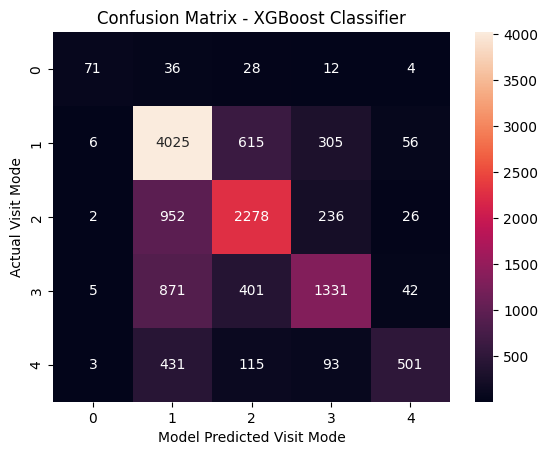

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm_xgb, annot= True, fmt= 'g')

plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Model Predicted Visit Mode")
plt.ylabel("Actual Visit Mode")

plt.show()

# **3. Recommendations: Personalized Attraction Suggestions]**

Objective:
Develop a recommendation system to suggest tourist attractions based on a user's historical preferences and similar users’ preferences.


In [185]:
# Core libraries
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.metrics.pairwise import cosine_similarity

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [198]:
Tourism_data.head(2)

,UserId,VisitYear,VisitMonth,Rating,VisitMode_x,Attraction,AttractionType,CityName,Country,Region,Continent,Average rating per user,Average rating per attraction
0,70456,2022,10,5,1,22,2,2266,46,14,2,1.0,0.663674
1,7567,2022,10,5,3,22,2,425,21,12,1,1.0,0.663674


STEP 1: Collaborative Filtering

In [199]:
#Fetch only necessary Columns
Filter  = Tourism_data[['UserId','Attraction','Rating']]
Filter

,UserId,Attraction,Rating
0,70456,22,5
1,7567,22,5
2,79069,22,5
3,31019,22,3
4,43611,22,3
...,...,...,...
62218,87100,9,4
62219,88112,9,5
62220,88112,9,4
62221,88112,9,4


In [202]:
Filter['Attraction'].head()

,Attraction
0,22
1,22
2,22
3,22
4,22


In [200]:
user_attraction_matrix = Filter.pivot_table(
    index='UserId',
    columns='Attraction',  # Must contain real names
    values='Rating'
).fillna(0)

user_attraction_matrix.columns.name = None
user_attraction_matrix = user_attraction_matrix.reset_index()

In [201]:
user_attraction_matrix

,UserId,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,14,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,5.0,4.25,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2,20,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33525,88179,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33526,88185,0.0,4.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,5.0,0.0,0.0,0.0,4.0,0.0
33527,88187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,5.0,0.0,0.0,0.0,0.0,0.0
33528,88189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
# Save user_attraction_matrix to CSV (for Streamlit app later)
user_attraction_matrix.to_csv('user_attraction_matrix.csv', index=False)

In [203]:

# We'll skip UserId column → take only attraction columns
x_feature = user_attraction_matrix.drop('UserId', axis=1)
x_feature

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,5.0,4.25,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33525,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33526,0.0,4.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,5.0,0.0,0.0,0.0,4.0,0.0
33527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,5.0,0.0,0.0,0.0,0.0,0.0
33528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
# Transpose → we want Attraction x Attraction similarity
attraction_similarity = cosine_similarity(x_feature.T)
attraction_similarity

array([[1.00000000e+00, 7.26143137e-03, 0.00000000e+00, 4.47631730e-03,
        0.00000000e+00, 1.80367522e-03, 6.60880267e-03, 2.51424483e-03,
        0.00000000e+00, 0.00000000e+00, 1.90716494e-02, 0.00000000e+00,
        9.71623206e-03, 0.00000000e+00, 0.00000000e+00, 1.47405417e-02,
        1.85935871e-02, 2.01963274e-02, 2.57858725e-02, 0.00000000e+00,
        2.97198932e-03, 6.18376344e-03, 5.18537238e-03, 0.00000000e+00,
        5.90815547e-03, 2.07278687e-02, 0.00000000e+00, 1.62025336e-02,
        3.15139430e-03, 5.11260512e-03],
       [7.26143137e-03, 1.00000000e+00, 0.00000000e+00, 1.16496257e-01,
        5.82307544e-03, 6.73711622e-02, 4.56654967e-03, 2.03753720e-01,
        1.10792276e-02, 8.58573007e-03, 0.00000000e+00, 1.48599724e-02,
        1.08698338e-02, 5.22838277e-03, 1.74395049e-03, 0.00000000e+00,
        4.75844244e-03, 1.44692012e-02, 0.00000000e+00, 4.30294691e-03,
        7.68708078e-02, 6.34399247e-02, 2.74019171e-01, 4.30533448e-03,
        1.07138568e-01,

In [204]:
user_attraction_matrix.columns

Index(['UserId',        0,        1,        2,        3,        4,        5,
              6,        7,        8,        9,       10,       11,       12,
             13,       14,       15,       16,       17,       18,       19,
             20,       21,       22,       23,       24,       25,       26,
             27,       28,       29],
      dtype='object')

In [205]:

user_attraction_matrix.columns.tolist()

['UserId',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [206]:
# Convert to DataFrame
attractions = user_attraction_matrix.columns.tolist()
attractions.remove('UserId')
attractions

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [207]:
# Create DataFrame with proper row/column names
attraction_similarity_df = pd.DataFrame(attraction_similarity, index=attractions, columns=attractions)
attraction_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.007261,0.000000,0.004476,0.000000,0.001804,0.006609,0.002514,0.000000,0.000000,...,0.002972,0.006184,0.005185,0.000000,0.005908,0.020728,0.000000,0.016203,0.003151,0.005113
1,0.007261,1.000000,0.000000,0.116496,0.005823,0.067371,0.004567,0.203754,0.011079,0.008586,...,0.076871,0.063440,0.274019,0.004305,0.107139,0.005092,0.008634,0.007641,0.072205,0.079152
2,0.000000,0.000000,1.000000,0.005156,0.000000,0.002571,0.000000,0.002689,0.000000,0.000000,...,0.000000,0.000000,0.004345,0.000000,0.002063,0.000000,0.000000,0.000000,0.002174,0.004095
3,0.004476,0.116496,0.005156,1.000000,0.002019,0.060539,0.004751,0.085622,0.006563,0.011200,...,0.064780,0.061706,0.116497,0.010141,0.207088,0.004511,0.016521,0.008234,0.083907,0.081870
4,0.000000,0.005823,0.000000,0.002019,1.000000,0.003121,0.080101,0.000000,0.000000,0.000000,...,0.011245,0.000000,0.002176,0.000000,0.002672,0.008457,0.000000,0.104230,0.008141,0.000000
5,0.001804,0.067371,0.002571,0.060539,0.003121,1.000000,0.001813,0.054642,0.002898,0.006557,...,0.063292,0.045633,0.110575,0.000697,0.066626,0.001319,0.005747,0.000000,0.099016,0.057557
6,0.006609,0.004567,0.000000,0.004751,0.080101,0.001813,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002389,0.000000,0.001964,0.107582,0.021037,0.057762,0.003451,0.000000
7,0.002514,0.203754,0.002689,0.085622,0.000000,0.054642,0.000000,1.000000,0.004650,0.003212,...,0.058921,0.045319,0.174610,0.001476,0.070828,0.007572,0.006600,0.005141,0.059994,0.063872
8,0.000000,0.011079,0.000000,0.006563,0.000000,0.002898,0.000000,0.004650,1.000000,0.000000,...,0.007851,0.007608,0.007463,0.000000,0.009225,0.008877,0.000000,0.012119,0.004487,0.008248
9,0.000000,0.008586,0.000000,0.011200,0.000000,0.006557,0.000000,0.003212,0.000000,1.000000,...,0.010003,0.002949,0.012281,0.000000,0.013098,0.013570,0.000000,0.021874,0.010206,0.007234


In [208]:
# Save user_attraction_matrix to CSV (for Streamlit app later)
attraction_similarity_df.to_csv('attraction_similarity.csv')

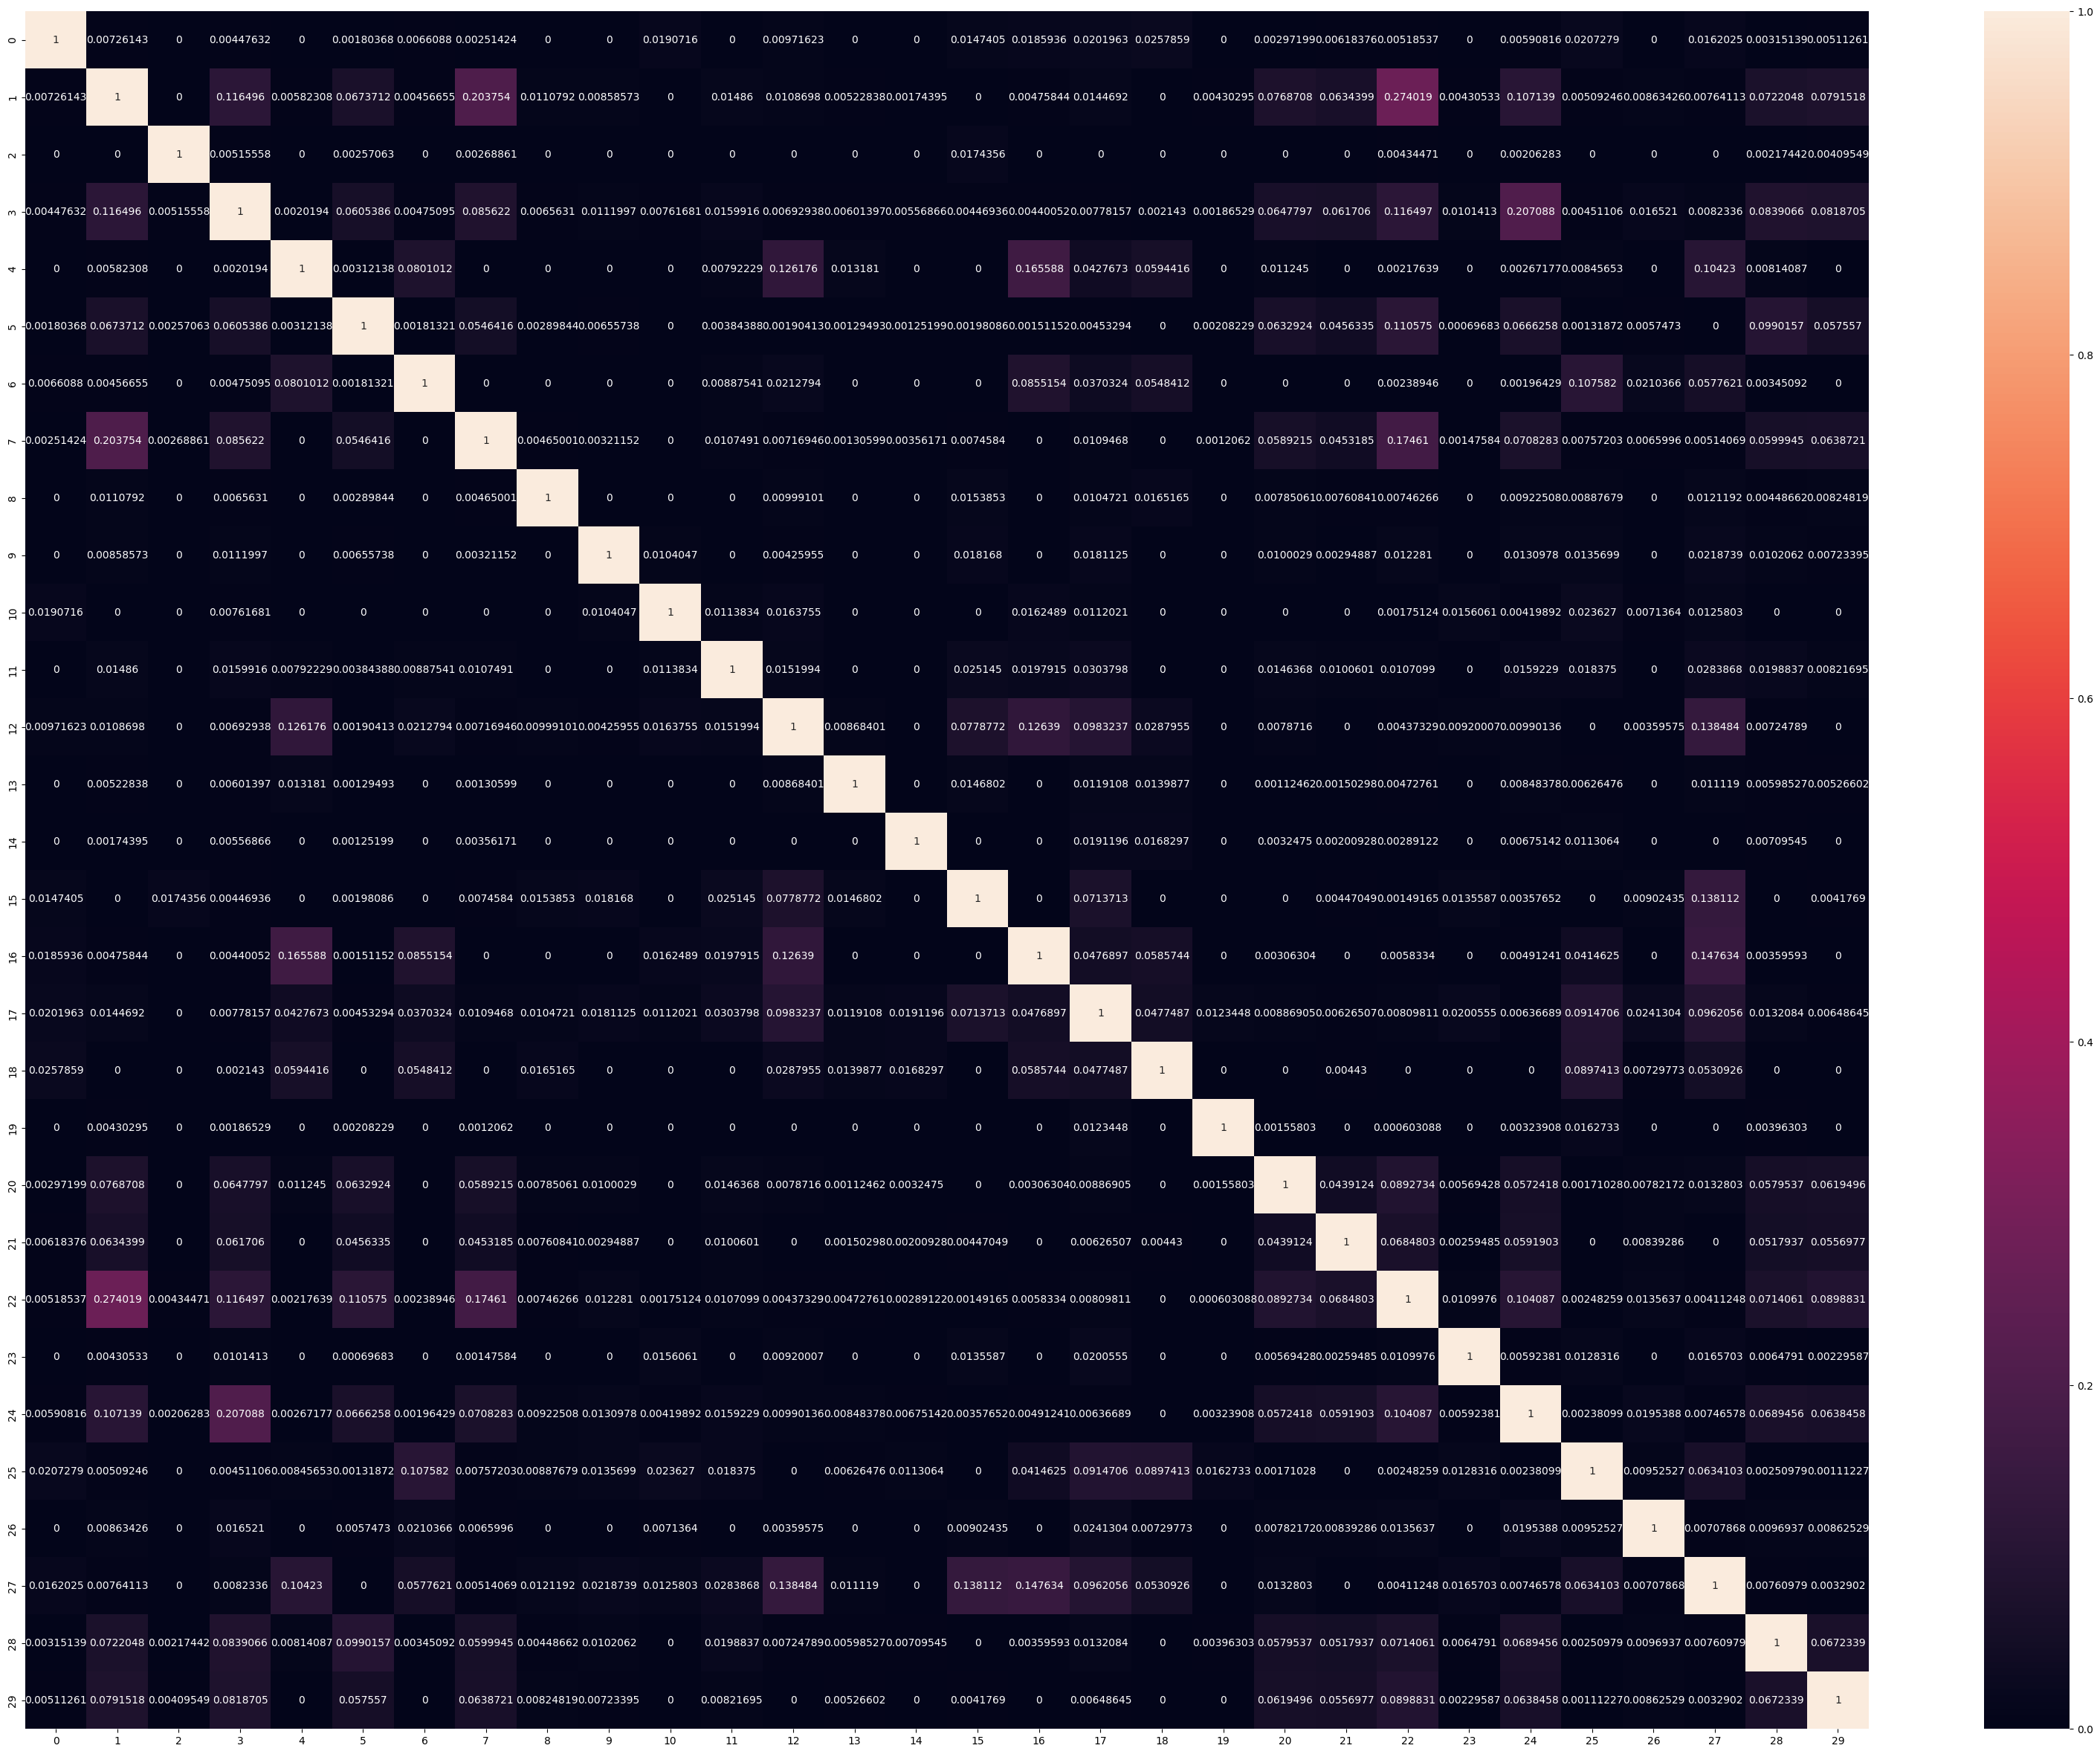

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (40, 30))
sns.heatmap(attraction_similarity_df, annot= True, fmt= 'g')

plt.show()

STEP 2: Content-Based Filtering

In [210]:
Tourism_data.head(2)

,UserId,VisitYear,VisitMonth,Rating,VisitMode_x,Attraction,AttractionType,CityName,Country,Region,Continent,Average rating per user,Average rating per attraction
0,70456,2022,10,5,1,22,2,2266,46,14,2,1.0,0.663674
1,7567,2022,10,5,3,22,2,425,21,12,1,1.0,0.663674


In [211]:
df_combined  = Tourism_data[['AttractionType','CityName','Rating','Attraction']].drop_duplicates().reset_index(drop=True)
df_combined

,AttractionType,CityName,Rating,Attraction
0,2,2266,5,22
1,2,425,5,22
2,2,4425,5,22
3,2,2010,3,22
4,2,1128,3,22
...,...,...,...,...
20445,3,5137,4,9
20446,3,2568,3,9
20447,3,2568,4,9
20448,3,599,5,9


In [212]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20450 entries, 0 to 20449
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   AttractionType  20450 non-null  int64
 1   CityName        20450 non-null  int64
 2   Rating          20450 non-null  int64
 3   Attraction      20450 non-null  int64
dtypes: int64(4)
memory usage: 639.2 KB


In [213]:
df_combined.shape

(20450, 4)

In [215]:
# 2️⃣ Preprocess: Combine text features for TF-IDF
df = (
    df_combined['AttractionType'].fillna('').astype(str) + ' ' +
    df_combined['CityName'].fillna('').astype(str) + ' ' +
    df_combined['Attraction'].fillna('').astype(str) + ' ' +
    df_combined['Rating'].fillna(0).astype(str)
)
df

,0
0,2 2266 22 5
1,2 425 22 5
2,2 4425 22 5
3,2 2010 22 3
4,2 1128 22 3
...,...
20445,3 5137 9 4
20446,3 2568 9 3
20447,3 2568 9 4
20448,3 599 9 5


In [216]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 3️⃣ Vectorize combined text using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf

TfidfVectorizer(stop_words='english')

In [217]:
tfidf_matrix = tfidf.fit_transform(df)
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 33120 stored elements and shape (20450, 5379)>

In [218]:
## **converting from number format to array**
df_enc = pd.DataFrame(tfidf_matrix.toarray(),columns=tfidf.get_feature_names_out())

df_enc.head()

,10,100,1000,1001,1002,1003,1004,1005,1006,1007,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
from sklearn.neighbors import NearestNeighbors

# 4️⃣ Fit KNN model
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn

NearestNeighbors(metric='cosine', n_neighbors=10)

In [220]:
knn.fit(tfidf_matrix)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [221]:
# Prepare attraction lookup
df_attraction = Tourism_data[['AttractionType','CityName','Rating','Attraction']].drop_duplicates().reset_index(drop=True)
df_attraction

,AttractionType,CityName,Rating,Attraction
0,2,2266,5,22
1,2,425,5,22
2,2,4425,5,22
3,2,2010,3,22
4,2,1128,3,22
...,...,...,...,...
20445,3,5137,4,9
20446,3,2568,3,9
20447,3,2568,4,9
20448,3,599,5,9


In [222]:
df_attraction.shape

(20450, 4)

In [223]:
import joblib

# 5️⃣ Save vectorizer and KNN model
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')
joblib.dump(knn, 'knn_model.joblib')

# 6️⃣ (Optional) Save the dataframe with attraction names for easy lookup
df_attraction.to_csv('attraction_lookup.csv', index=False)

print("✅ Model and vectorizer saved! Ready for Streamlit app.")

✅ Model and vectorizer saved! Ready for Streamlit app.
